<a href="https://colab.research.google.com/github/DhanieArdiyan/ASE2306-Capstone-Project/blob/main/Capstone_Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install stopwords

In [2]:
pip install nltk

In [ ]:
pip install wordcloud

# INITIALISATION & AUTHORISATION STAGE
Just a note, the consumer_key, consumer_secret, access_token, access_token_secret are unique to my own Twitter Developer account access. 

If test run is unsuccessful, do contact me for verification.

In [4]:
#START INITIALISATION
from textblob import TextBlob
from wordcloud import WordCloud
import re
import pandas as pd 
import numpy as np 
import sys, tweepy
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')

def percentage(part, whole):
	return 100 * float(part)/float(whole)

consumer_key = "duCD34AKM0yj2FJGe1vOomirc"
consumer_secret = "aKkRF84oLs3pGm5gJzPavojoI23WZXMxrv4FWGZMKWnnSCoF1r"
access_token = "1284696550740901893-xwi5gsHUdnwnD1ztZbSyVdhe6ZWdev"
access_token_secret = "y8yNJJIxXtKiUgeY6kh8xWNSGEssNdCAdTIwQqnqR57yk"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret) 
auth.set_access_token(access_token, access_token_secret) 
api = tweepy.API(auth, wait_on_rate_limit=True) 

# 2. EXTRACTING TWEETS
This part of the codes consists of the main program extracting the tweets. There are 3 ways in which the user can extract the tweets:

1.   Input the keyword only
2.   Skip the keyword, and input username only
3.   Input keyword + username (finding keywords in one specific account)

For this case, we will using Option 2, which is analysing tweets under the account of ChannelNewsAsia. We will analyse 100 tweets (the max count), and the list will display the most recent 100 tweets, up to 7 days ago (a limitation of using the standard Tweepy API). 


Polarity: A float which lies in the range between -1 to 1, where 1 would equate to a positive statement and -1 would equate to a negative statement. 

Subjectivity: Sentences which generally refer to personal opinions, emotion or judgement. Subjectivity is also a float which lies in the range between 0 to 1.





In [5]:
#EXTRACTING TWEETS
keyWord = input("Enter the keyword you are searching for (skip if NA):  ") #search by keyword
UserName = input("Enter the Twitter username (excluding @, skip if NA): ") #search by username
inputString = keyWord +" from:" + UserName

public_tweets = api.search(q=inputString, count=100, lang = "en")

i = 1
for tweet in public_tweets:
  print ('\n')
  print ((str(i) + ') ' + tweet.text))
  print (('Tweeted by') + ': ' + str(tweet.user.screen_name))
  print (('Tweeted at') + ': ' + str(tweet.user.location))
  print (('Tweeted on') + ': ' + str(tweet.created_at))
  i=i+1
  # print(tweet.text)

#IF I want to print the latest 5 tweets from the account
# print("Show the 5 recent tweets: \n")
# i = 1
# for tweet in posts [0:5]:
#     print ((str(i) + ') ' + tweet.full_text + '\n'))
#     i = i + 1

#Creating a dataframe with a column called Tweets
df = pd.DataFrame ([tweet.text for tweet in public_tweets], columns = ['Tweets'])

#Show first 5 rows of data
df.head()

#function to clean the tweets
def cleanTxt(text):
	text = re.sub(r'@[A-Za-z0-9]+', '', text) #removes @mentions
	text = re.sub(r'#', '', text) #removes the '#'
	text = re.sub(r'RT[\s+]+', '', text) #removing RT
	text = re.sub(r'https?:\/\/\S+', '', text) #removes hyperlinks
	return text

#cleaning the text
df['Tweets'] = df['Tweets'].apply(cleanTxt)

#Show the cleaned text
df

#Subjectivity function
def getSubjectivity(text):
	return TextBlob(text).sentiment.subjectivity

#Polarity function
def getPolarity(text):
	return TextBlob(text).sentiment.polarity

#Creating columns for Subjectivity and Polarity
df ['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df ['Polarity'] = df['Tweets'].apply(getPolarity)

#Show the new dataframe with the new columns
df


Enter the keyword you are searching for (skip if NA):  
Enter the Twitter username (excluding @, skip if NA): channelnewsasia


1) Wolves have room for improvement, says Nuno https://t.co/sOrrVZWCtu https://t.co/iBZGoWsrPk
Tweeted by: ChannelNewsAsia
Tweeted at: Singapore
Tweeted on: 2020-11-07 09:04:02


2) Tesco gets nod for sale of Thailand supermarket business https://t.co/uhT3UJ0eGu https://t.co/YPS47NZQ7A
Tweeted by: ChannelNewsAsia
Tweeted at: Singapore
Tweeted on: 2020-11-07 08:50:34


3) Books? Hairdressers? Europeans split on COVID-19 lockdown essentials https://t.co/jCHSTv7PCg https://t.co/EwCHOOwsIJ
Tweeted by: ChannelNewsAsia
Tweeted at: Singapore
Tweeted on: 2020-11-07 08:50:33


4) Djokovic clinches sixth year-end No. 1 ranking to tie Sampras https://t.co/pMawKnzRIe https://t.co/LBhQzlQ3u5
Tweeted by: ChannelNewsAsia
Tweeted at: Singapore
Tweeted on: 2020-11-07 08:36:33


5) Japan star sees gymnastics event as 'model' for Olympics https://t.co/eDnN9hEXiw https://t.co/lWd

,Tweets,Subjectivity,Polarity
0,"Wolves have room for improvement, says Nuno",0.00,0.00
1,Tesco gets nod for sale of Thailand supermarke...,0.00,0.00
2,Books? Hairdressers? Europeans split on COVID-...,0.00,0.00
3,Djokovic clinches sixth year-end No. 1 ranking...,0.00,0.00
4,Japan star sees gymnastics event as 'model' fo...,0.00,0.00
...,...,...,...
95,US job growth slows in October; unemployment r...,0.00,0.00
96,Legendary Soviet satirist Zhvanetsky dies aged...,0.70,0.45
97,Football: Chelsea's Lampard hails defensive im...,0.00,0.00
98,Maradona sedated to help ease recovery from al...,0.00,0.00


# 3. PLOTTING WORDCLOUD
WordCloud is a data visualization technique used for representing text data, in which the size of each word indicates its frequency or importance. If the same words are detected very frequently, then the size of that particular word will be very big in the wordcloud.

I'm having trouble at this part (seen in my error as attached). I have tried to troubleshoot it by researching various example but I can't seem to get it right.

In [6]:
# #Plotting WORDCLOUD
from wordcloud import WordCloud
allWords = ' '.join( [twts for twts in df['Tweets']] )
wordCloud = WordCloud(width = 5000, height = 300, random_state = 21, max_font_size = 100).generate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear") #bilinear to make displayed image more smooth
plt.axis('off')
plt.show()



TypeError: ignored

In [7]:
#Computing the negative, neutral, positive analysis
def getAnalysis (score):
	if score < 0:
		return 'Negative'
	elif score == 0:
		return 'Neutral'
	else:
		return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)
df


,Tweets,Subjectivity,Polarity,Analysis
0,"Wolves have room for improvement, says Nuno",0.00,0.00,Neutral
1,Tesco gets nod for sale of Thailand supermarke...,0.00,0.00,Neutral
2,Books? Hairdressers? Europeans split on COVID-...,0.00,0.00,Neutral
3,Djokovic clinches sixth year-end No. 1 ranking...,0.00,0.00,Neutral
4,Japan star sees gymnastics event as 'model' fo...,0.00,0.00,Neutral
...,...,...,...,...
95,US job growth slows in October; unemployment r...,0.00,0.00,Neutral
96,Legendary Soviet satirist Zhvanetsky dies aged...,0.70,0.45,Positive
97,Football: Chelsea's Lampard hails defensive im...,0.00,0.00,Neutral
98,Maradona sedated to help ease recovery from al...,0.00,0.00,Neutral


# 4. SEGREGATING SENTIMENTS
The following parts that follows will classify the tweets based on their sentiments, either Positive, Negative, or Neutral. Lastly, a Bar graph and a Scatter plot would help to assist in illustration to observe how the tweets of the user are roughly feeling.

As we can observe, there are certain tweets which were not classified properly. For example under the first few positive tweets, it should not be regarded as a positive sentiment. As a human reader, we would understand that it would be better suited for a negative sentiment, since having a Covid case is undesirable.

This would question the accuracy of the sentiment analysis, in which if given more time, I would research on it.


In [8]:
#To seperate and print POSITIVE tweets
j = 1
sortedDF = df.sort_values(by=['Polarity'])
for i in range (0, sortedDF.shape[0]):
	if (sortedDF['Analysis'][i] == 'Positive'):
		print (str(j) + ') '+sortedDF['Tweets'][i])
		print()
		j = j + 1


1) 7 new COVID-19 cases in Singapore, all imported  

2) Singapore reports 7 new COVID19 cases, all imported: MOH
 

3) Important to talk about mental health, says Chelsea's Chilwell  

4) Netherlands' Miedema backs Wiegman for England success  

5) Joe Biden projects confidence he will win White House with 'clear majority'  

6) China exports remain strong in October, import growth slows  

7) VIDEO: The latest job market figures showed Singapore's unemployment rate climbing to a 16-year high. When will thi… 

8) China reports 33 new coronavirus cases  

9) Soccer-Sassuolo held by Udinese, miss chance to top Serie A  

10) Southwest Airlines issues notices of furloughs for first time in 49-year existence  

11) Johnny Depp is out of Fantastic Beasts after losing 'wife beater' case  

12) Football: Southampton go top with 2-0 win over Newcastle  

13) Rossi OK to race but Yamaha boss goes into quarantine  

14) Analysis: High-flying US tech stocks get post-election lift, near new highs

In [9]:
#To seperate and print NEGATIVE tweets
j = 1
sortedDF = df.sort_values(by=['Polarity'], ascending='False')
for i in range(0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][i] == 'Negative'):
    print (str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j = j + 1

1) A look at Myanmar's election and Aung San Suu Kyi's expected victory  

2) In India, polluted air spells trouble for COVID-19 patients  

3) "Let's put the anger and demonisation behind us. It's time for us to come together as a nation to heal": Joe Biden… 

4) Former Singapore international footballer Salim Moin dies aged 59  

5) Why is US vote count taking so long?  

6) Commentary: What's behind claims of electoral fraud in US elections  

7) Commentary: The never-ending political game of Mahathir Mohamad  

8) Stressed out, anxious and unable to focus? Here are 10 ways to calm down  

9) Republicans seeking to raise at least US$60 million to fund Trump legal challenges  

10) Brazil off to bad start on Paris climate deal: Watchdog  

11) Europe COVID-19 deaths surge past 300,000  

12) Trump faces tough road in getting Supreme Court to intervene  

13) Wall Street Week Ahead: Small caps join market rally but pandemic could derail them  

14) Small group of Southwest workers rec

In [10]:
#To seperate and print NEUTRAL tweets
j = 1
sortedDF = df.sort_values(by=['Polarity'])
for i in range (0, sortedDF.shape[0]):
	if (sortedDF['Analysis'][i] == 'Neutral'):
		print (str(j) + ') '+sortedDF['Tweets'][i])
		print()
		j = j + 1


1) Wolves have room for improvement, says Nuno  

2) Tesco gets nod for sale of Thailand supermarket business  

3) Books? Hairdressers? Europeans split on COVID-19 lockdown essentials  

4) Djokovic clinches sixth year-end No. 1 ranking to tie Sampras  

5) Japan star sees gymnastics event as 'model' for Olympics  

6) Not waiting: Biden transition team at work amid limbo  

7) Not waiting: Biden transition team at work amid limbo  

8) Trump chief of staff Meadows diagnosed with COVID-19  

9) Newcastle boss Bruce sweats over fitness of striker Wilson  

10) COVID-19: Australia to allow additional 450 citizens to return before end of 2020  

11) Supreme Court denies immediate halt of Pennsylvania count  

12) US COVID-19 cases hit record for third day, topping 127,000  

13) Baffert's Improbable battles stacked field at Breeders' Cup  

14) USElections2020: As Joe Biden edges closer to securing enough votes, Donald Trump has vowed to continue his legal… 

15) Trump says Biden 'should

In [11]:
#POSITIVE TWEETS in %
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']

positive = round ( (ptweets.shape[0]/df.shape[0]) * 100, 1)
positive

38.0

In [12]:
#NEGATIVE TWEETS in %
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']

negative = round ( (ntweets.shape[0]/df.shape[0]) * 100, 1)
negative

18.0

In [13]:
#NEUTRAL TWEETS in %
100 - positive - negative

44.0

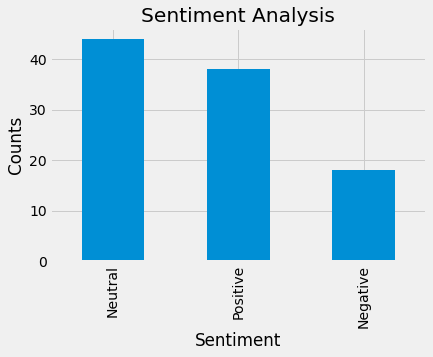

In [14]:
#BAR GRAPH - POSITIVE, NEGATIVE, NEUTRAL
df['Analysis'].value_counts()

#plot and visualise the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()

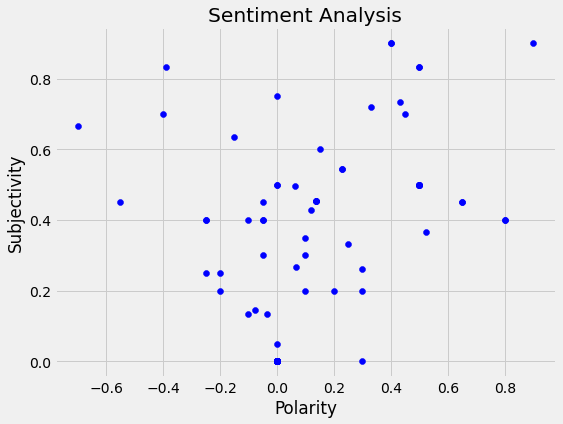

In [15]:
#SCATTER PLOT - POLARITY AND SUBJECTIVITY
plt.figure(figsize = (8,6))
for i in range (0,df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Blue') #(x,y axis)

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [ ]:
#ATTEMPT 1 TO MEASURE ACCURACY
#METHOD: USING LSTM & RNN
#link: https://analyticsindiamag.com/how-to-implement-lstm-rnn-network-for-sentiment-analysis/

In [ ]:
# from google.colab import files

# df.to_csv('insertcsvfilehere.csv')
# files.download('insertcsvfilehere.csv')

In [ ]:
# import numpy as np
# import pandas as pd
# from keras.models import Sequential
# from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
# from sklearn.model_selection import train_test_split
# from sklearn.feature_extraction.text import CountVectorizer
# from keras.preprocessing.text import Tokenizer
# from keras.preprocessing.sequence import pad_sequences
# from keras.utils.np_utils import to_categorical
# import re

# from google.colab import files

# df.to_csv('f1.csv')
# files.download('f1.csv')

# print(df.columns)

In [ ]:
# new_df = df[['text','sentiment']]

# print(data.sentiment)

In [ ]:
# new_df = new_df[new_df.sentiment != "Neutral"]
# new_df['text'] = new_df['text'].str.lower()
# new_df['text'] = new_df['text'].re.sub('[^a-zA-z0-9\s]')

# tokenizer = Tokenizer(num_words=1500, split=' ')
# tokenizer.fit_on_texts(data['text'].values)
# X = tokenizer.texts_to_sequences(new_df['text'])
# X = pad_sequences(X)

# embed_dim = 128
# lstm_out = 196
# model = Sequential()
# model.add(Embedding(vocabSize, embed_dim,input_length = 28)) 

# model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
# model.add(Dense(2,activation='softmax'))
# model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# Le = LabelEncoder()
# y = Le.fit_transform(new_df['sentiment'])

# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.15, random_state = 42)
# model.fit(X_train, Y_train,validation_data = (X_test,y_test),epochs = 10, batch_size=32)

# model.evaluate(X_test,y_test)

In [ ]:
# print("Prediction: ",model.predict_classes(X_test[5:10]))
# print("Actual: \n",y_test[5:10])

In [ ]:
#ATTEMPT 2 TO MEASURE ACCURACY
#METHOD: Training model by RandomForestClassifier algorithm
#link: https://stackabuse.com/python-for-nlp-sentiment-analysis-with-scikit-learn/

In [ ]:
# import matplotlib.pyplot as plt 
# import nltk
# from nltk.corpus import stopwords
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# processed_features = []
# features = df['Tweets']


# for sentence in range(0, len(features)):
#     # Remove all the special characters
#     processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

     # remove all single characters
#     processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

#     # Remove single characters from the start
#     processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

#     # Substituting multiple spaces with single space
#     processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

#     # Removing prefixed 'b'
#     processed_feature = re.sub(r'^b\s+', '', processed_feature)

#     # Converting to Lowercase
#     processed_feature = processed_feature.lower()

#     processed_features.append(processed_feature)

# processed_features

In [ ]:
# from nltk.corpus import stopwords
# from sklearn.feature_extraction.text import TfidfVectorizer

# vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
# processed_features = vectorizer.fit_transform(processed_features).toarray()

# #max_features = most frequently occuring words to create a bag of words feature vector
# #max_df = specifies to only using words that occur in a maximum of 80% of the docs
# #min_df = similar, include words that occur in at least 7 docs

In [ ]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(processed_features, df, test_size=0.2, random_state=0)

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.preprocessing import StandardScaler

# text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
# text_classifier.fit(X_train, y_train)

In [ ]:
# predictions = text_classifier.predict(X_test)

In [ ]:
# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# print(confusion_matrix(y_test,predictions))
# print(classification_report(y_test,predictions))
# print(accuracy_score(y_test, predictions))

In [ ]:
#ATTEMPT 3 TO MEASURE ACCURACY
#METHOD: Implementing SVM with Scikit-Learn
#link: https://stackabuse.com/implementing-svm-and-kernel-svm-with-pythons-scikit-learn/

In [ ]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# %matplotlib inline

# bankdata = pd.read_csv("bill_authentication.csv")
# bankdata.shape
# bankdata.head()

# X = bankdata.drop('Class', axis=1)
# y = bankdata['Class']

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

# from sklearn.svm import SVC
# svclassifier = SVC(kernel='linear')
# svclassifier.fit(X_train, y_train)

# y_pred = svclassifier.predict(X_test)

# from sklearn.metrics import classification_report, confusion_matrix
# print(confusion_matrix(y_test,y_pred))
# print(classification_report(y_test,y_pred))